Trained on Windows 10, necessitate the installation of Tensorflow, numpy, matplotlib and opencv.
To being able to save the weights, a folder "method3" should be created on the disk. 

**Ressources used for the following code**


*   https://www.codeproject.com/Articles/5278503/Making-TensorFlow-Models-Portable-Using-ONNX
*   https://learning.oreilly.com/library/view/deep-learning-with/9781617294433/OEBPS/Text/05.xhtml 
* Chap. 5, Deep Learning with Python by François Chollet.


In [1]:
import tensorflow as tf
import os
import random as rd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

<h2>Loading and preprocessing</h2>

In [ ]:
!wget https://github.com/chiron-bang/Computer-Vision/blob/main/digit-recognition/data.zip?raw=true
!mv data.zip?raw=true data.zip
!unzip data

In [3]:
IMAGE_DIR = 'training/'
dir_list = os.listdir(IMAGE_DIR)
X,y = [], []

In [4]:
for dir_name in dir_list:
    file_names = os.listdir(IMAGE_DIR + dir_name)
    for file_name in file_names:
        img = cv.imread(IMAGE_DIR + dir_name + "/" + file_name, cv.IMREAD_GRAYSCALE)
        #img.astype('float') look into it later
        X.append(img)
        y.append(int(dir_name))




<h3>Shuffling and scaling the images</h3>

In [5]:
indexes = list(range(len(X)))
rd.shuffle(indexes)

X = np.array(X,dtype='float')
X = np.expand_dims(X, axis=3)

y = tf.keras.utils.to_categorical(y, num_classes=10)
y = np.array(y)
X /= 255.
X,y = X[indexes], y[indexes]

In [6]:
print(y.shape)
print(y[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h3>Splitting dataset</h3>

In [7]:
train_split, val_split = .9, 0.07
n_train = int(train_split * len(X))
n_val = int(val_split * len(X))
X_train, y_train = X[:n_train], y[:n_train]
X_val, y_val = X[n_train:n_train + n_val], y[n_train:n_train + n_val]
X_test, y_test = X[n_train + n_val:], y[n_train + n_val:]

In [8]:
print("Shape X_train: ", X_train.shape)
print("Shape X_val: ", X_val.shape)
print("Shape X_test: ", X_test.shape)

Shape X_train:  (54000, 28, 28, 1)
Shape X_val:  (4200, 28, 28, 1)
Shape X_test:  (1800, 28, 28, 1)


<h2>Defining the model</h2>

In [9]:
def model_create(input_shape):
    model = tf.keras.Sequential(name='nn_model')
    
    

    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))

    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-2), loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')
    model.build(input_shape)
    
    model.summary()
    return model

In [10]:
my_model = model_create((None,28,28,1))

Model: "nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [11]:
history = my_model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val,y_val), validation_batch_size=64)
my_model.save('method3/model')

Epoch 1/50
844/844 [==============================] - 20s 5ms/step - loss: 0.4444 - accuracy: 0.0992 - val_loss: 0.3269 - val_accuracy: 0.0993
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 0.3306 - accuracy: 0.1183 - val_loss: 0.3250 - val_accuracy: 0.1367
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 0.3280 - accuracy: 0.1392 - val_loss: 0.3230 - val_accuracy: 0.2071
Epoch 4/50
844/844 [==============================] - 6s 7ms/step - loss: 0.3255 - accuracy: 0.1661 - val_loss: 0.3195 - val_accuracy: 0.2800
Epoch 5/50
844/844 [==============================] - 7s 9ms/step - loss: 0.3211 - accuracy: 0.2254 - val_loss: 0.3132 - val_accuracy: 0.4783
Epoch 6/50
844/844 [==============================] - 5s 6ms/step - loss: 0.3111 - accuracy: 0.3170 - val_loss: 0.2936 - val_accuracy: 0.5331
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2791 - accuracy: 0.4237 - val_loss: 0.2401 - val_accuracy: 0.5912
Epoch

<h2>Plotting accuracy and loss</h2>

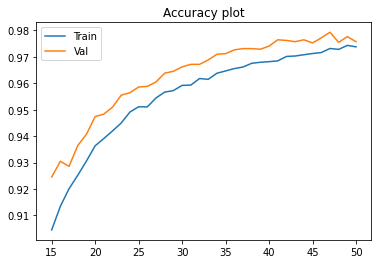

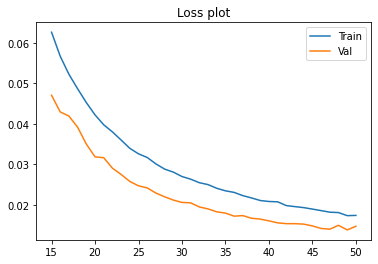

In [12]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(range(15, len(acc) + 1), acc[14:])
plt.plot(range(15, len(val_acc) + 1), val_acc[14:])
plt.legend(['Train', 'Val'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy plot')
plt.show()

plt.figure()

plt.plot(range(15, len(loss) + 1), loss[14:])
plt.plot(range(15, len(val_loss) + 1), val_loss[14:])
plt.legend(['Train', 'Val'])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title('Loss plot')
plt.show()

In [13]:
# Evaluating the trained model
my_model.evaluate(X_test, y_test)

57/57 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9678


[0.019418267533183098, 0.9677777886390686]

In [ ]:
# Command used to convert to a portable format which can be used on opencv for inference
!pip install  tf2onnx
!python3 -m tf2onnx.convert --saved-model "method3/model" --output "method3/cnn_model.onnx"

In [19]:
# Loading the model in the onnx format 
loaded_model = cv.dnn.readNetFromONNX('method3/cnn_model.onnx')

In [20]:
!ls method3

cnn_model.onnx	model


Let's check the output of our model for a sample

In [34]:
loaded_model.setInput(X[0])

In [35]:
y_0 = loaded_model.forward()

In [39]:
print("Probabilities predicted\n", y_0)

Probabilities predicted
 [[3.7061031e-13 6.8934386e-11 2.1821733e-13 2.1819680e-08 1.1979357e-15
  1.0000000e+00 1.9472524e-11 8.9391534e-14 1.8758194e-10 6.6238390e-11]]


In [40]:
print("The digit predicted is", np.argmax(y_0))

The digit predicted is 5


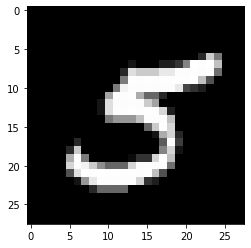

In [41]:
# Verifying the prediction
plt.imshow(X[0][...,0], cmap="gray")